In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df1=df.drop(["ID"],axis=1)
df1.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df1.shape

(200, 4)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Label1=LabelEncoder()
df1['Gender'] = Label1.fit_transform(df1.iloc[:,0])

In [10]:
print(df1['Gender'])

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32


In [11]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
spending_score_male = 0
spending_score_female = 0
for i in range(len(df)):
    if df1['Gender'][i] == 1:
        spending_score_male = spending_score_male + df1['Spending Score (1-100)'][i]
    if df1['Gender'][i] == 0:
        spending_score_female = spending_score_female + df1['Spending Score (1-100)'][i]


In [13]:
print('Male spending score',spending_score_male)
print('Male female score',spending_score_female)


Male spending score 4269
Male female score 5771


Text(0.5, 1.0, 'Gender & Total Spending Score\n')

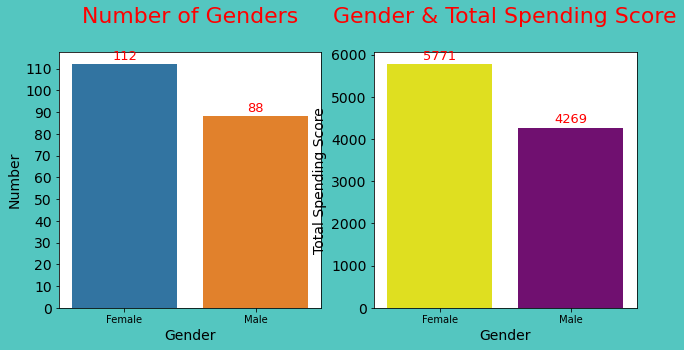

In [14]:
#relationship between gender and spending score.
#number of gender.
plt.figure(figsize=(16,16),facecolor='#54C6C0')
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female','Male'], y=df['Gender'].value_counts(), data=df)  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Number", size=14)
plt.yticks(np.arange(0,116,10),size='14')
plt.grid(False)
plt.title("Number of Genders\n", color="red", size='22')



# Gender & Total Spending Score

list_genders_spending_score = [int(spending_score_female),int(spending_score_male)]
series_genders_spending_score = pd.Series(data = list_genders_spending_score)


plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Total Spending Score", size=14)
plt.yticks(np.arange(0,6001,1000),size='14')
plt.grid(False)
plt.title("Gender & Total Spending Score\n", color="red", size='22')


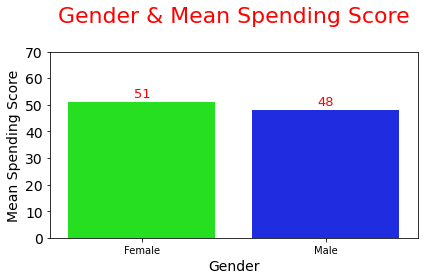

In [15]:
# Gender & Mean Spending Score 

list_genders_spending_score_mean = [int(spending_score_female/df['Gender'].value_counts()[0]),int(spending_score_male/df['Gender'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(1,1,1)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score_mean, palette='hsv')  

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')
    
plt.xlabel("Gender", size=14)
plt.ylabel("Mean Spending Score", size=14)
plt.yticks(np.arange(0,71,10),size='14')
plt.grid(False)
plt.title("Gender & Mean Spending Score\n", color="red", size='22')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age - Spending Score')

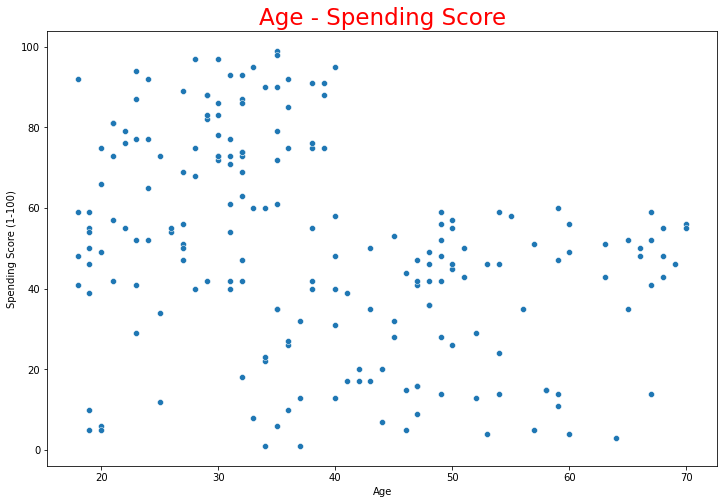

In [16]:
# Let's look at the relationship between Age and Spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 23, color='red')

Text(0.5, 1.0, 'Annual Income - Spending Score')

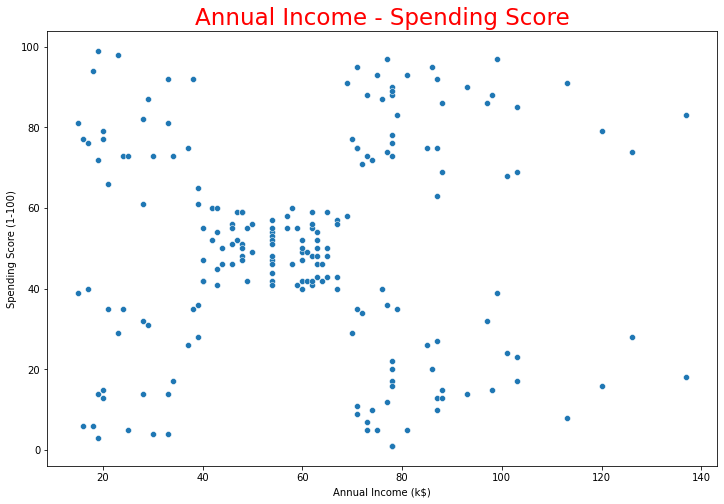

In [17]:
# Let's look at the relationship between Annual Income and Spending Score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 23, color='red')

In [27]:
x = df1.iloc[:,0:].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_2D = pca.fit_transform(X)

C:\Users\OISHI ROY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


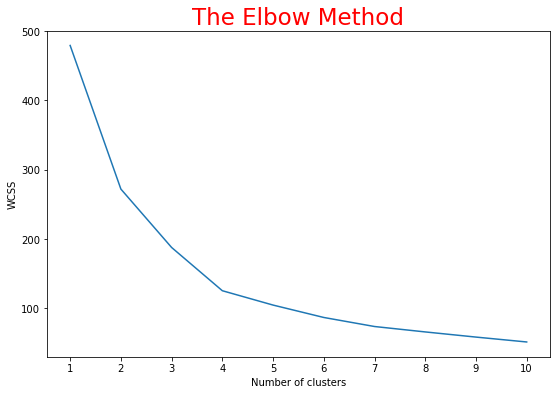

In [30]:
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

# '4' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the next optimal n_clusters.

In [34]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

In [40]:
kmeans = KMeans(n_clusters = 4)


In [41]:
kmeans.fit(X_2D)

KMeans(n_clusters=4)

In [45]:
clusters=kmeans.cluster_centers_

In [46]:
print(clusters)

[[ 1.12773395  0.75231371]
 [-1.15915328 -0.51472072]
 [ 0.80089898 -0.95285608]
 [-0.89924813  1.20707643]]


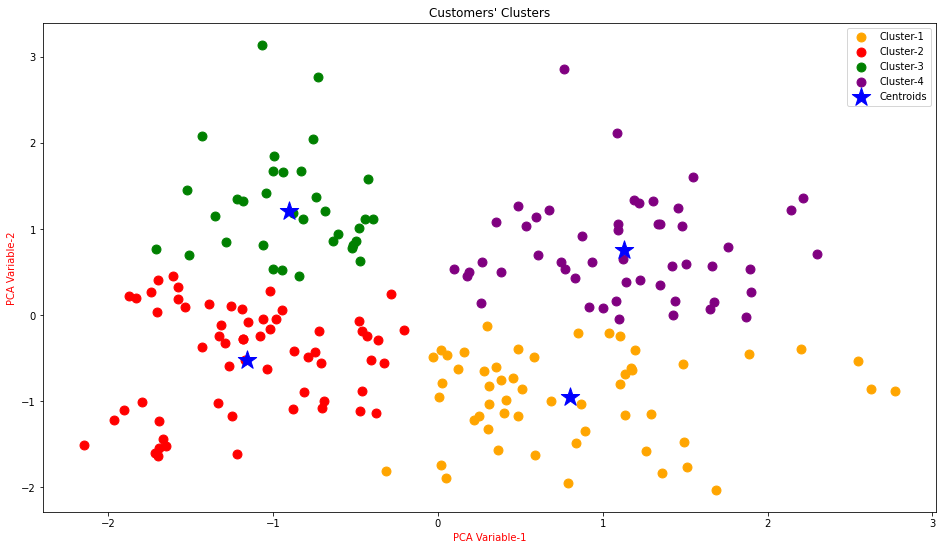

In [47]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1],s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1],s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1],s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1],s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*',s = 375, c = 'blue', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()